# Explorative Data Analysis

## Imports

In [15]:
import numpy as np 
import seaborn as sns
import json 
import matplotlib.pyplot as plt
import pandas as pd


## Data Preperation

In [16]:
#reading the json of the data
df_tweets = pd.read_json("tweets_with_sentiment.json", lines=False)

In [17]:
df_tweets

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,neg_prob,pos_prob,sentiment
0,2021-06-28 16:25:33,1409548535272407047,1409548535272407040,$ in babydoge giveaway alert to enter r...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,None,None,None,0.212891,0.787109,positive
1,2021-06-28 16:25:33,1409548536740552712,1409548536740552704,bitcoin could collapse el salvador s econom...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,None,None,None,0.444275,0.555725,positive
2,2021-06-28 16:25:34,1409548538988609537,1409548538988609536,amen brother! #dogecoin #tothemoon,"<a href=""http://twitter.com/download/android"" ...",False,1.409546e+18,1.409546e+18,8.055323e+17,8.055323e+17,...,None,NaN,NaN,NaN,None,None,None,0.364046,0.635954,positive
3,2021-06-28 16:25:34,1409548540234194947,1409548540234194944,the most powerful doge of them all is about ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.406900e+18,1.406900e+18,1.074695e+18,1.074695e+18,...,{'full_text': '@BitcoinAssn The most powerful ...,0.0,NaN,NaN,None,None,None,0.443402,0.556598,positive
4,2021-06-28 16:25:34,1409548540494245896,1409548540494245888,rakucoin $rakuc currently on eth and just lau...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,None,None,None,0.476097,0.523903,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2021-06-28 16:36:26,1409551275440619527,1409551275440619520,i went back to microwaving hot dogs in cups ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,None,None,None,0.741220,0.258780,negative
1003,2021-06-28 16:36:27,1409551275893665795,1409551275893665792,rakucoin $rakuc currently on eth and just lau...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,None,None,None,0.476097,0.523903,neutral
1004,2021-06-28 16:36:28,1409551282596057090,1409551282596057088,$ to one person in hours retweet &amp;...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,None,0.0,NaN,NaN,None,None,None,0.266901,0.733099,positive
1005,2021-06-28 16:36:31,1409551296525332485,1409551296525332480,the most powerful doge of them all is about ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.314213e+18,1.314213e+18,9.856861e+17,9.856861e+17,...,{'full_text': '@BinanceAcademy The most powerf...,0.0,NaN,NaN,None,None,None,0.418377,0.581623,positive


In [18]:
#extracting followers_count from user column
df_tweets["followers_count"] = 0
for index, row in df_tweets.iterrows():
  df_tweets["followers_count"][index] = df_tweets["user"][index]["followers_count"]
#extracting location from user column
df_tweets["location"] = 0
for index, row in df_tweets.iterrows():
  df_tweets["location"][index] = df_tweets["user"][index]["location"]  
#extracting verified from user column
df_tweets["verified"] = 0
for index, row in df_tweets.iterrows():
  df_tweets["verified"][index] = df_tweets["user"][index]["verified"]  
#extracting friends_count from user column
df_tweets["friends_count"] = 0
for index, row in df_tweets.iterrows():
  df_tweets["friends_count"][index] = df_tweets["user"][index]["friends_count"]    

<ipython-input-18-b3d64be6ba62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets["followers_count"][index] = df_tweets["user"][index]["followers_count"]
<ipython-input-18-b3d64be6ba62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets["location"][index] = df_tweets["user"][index]["location"]
C:\Users\lucaf\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [19]:
#dropping unneeded columns
df_tweets = df_tweets.drop(["created_at", "id", "id_str", "source", "truncated", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id_str", "in_reply_to_user_id", "in_reply_to_screen_name", "coordinates", "place", "quoted_status_id", "quoted_status_id_str", "is_quote_status", "quoted_status", "retweeted_status", "entities", "extended_entities", "favorited", "retweeted", "possibly_sensitive", "filter_level", "contributors", "geo", "user", "extended_tweet", "quoted_status_permalink", "location", "timestamp_ms", "display_text_range", "reply_count", "quote_count", "retweet_count", "favorite_count"], axis=1)

## Data Visualizations

### Proportion of sentiment

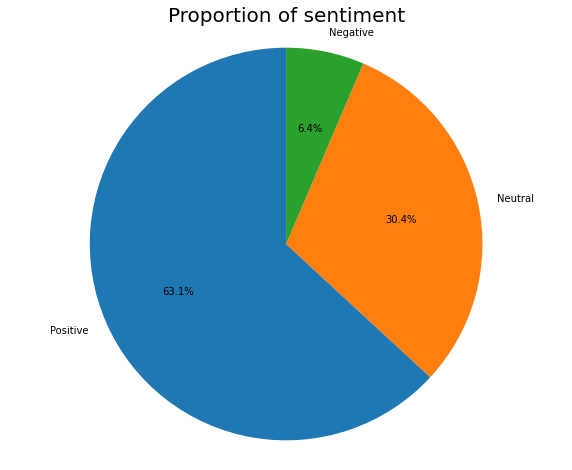

In [21]:
labels = "Positive", "Neutral", "Negative"
sizes = [df_tweets["sentiment"][df_tweets["sentiment"]=="positive"].count(), df_tweets["sentiment"][df_tweets["sentiment"]=="neutral"].count(), df_tweets["sentiment"][df_tweets["sentiment"]=="negative"].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Proportion of sentiment", size = 20)
plt.show()

### Categorical Information

<AxesSubplot:xlabel='verified', ylabel='count'>

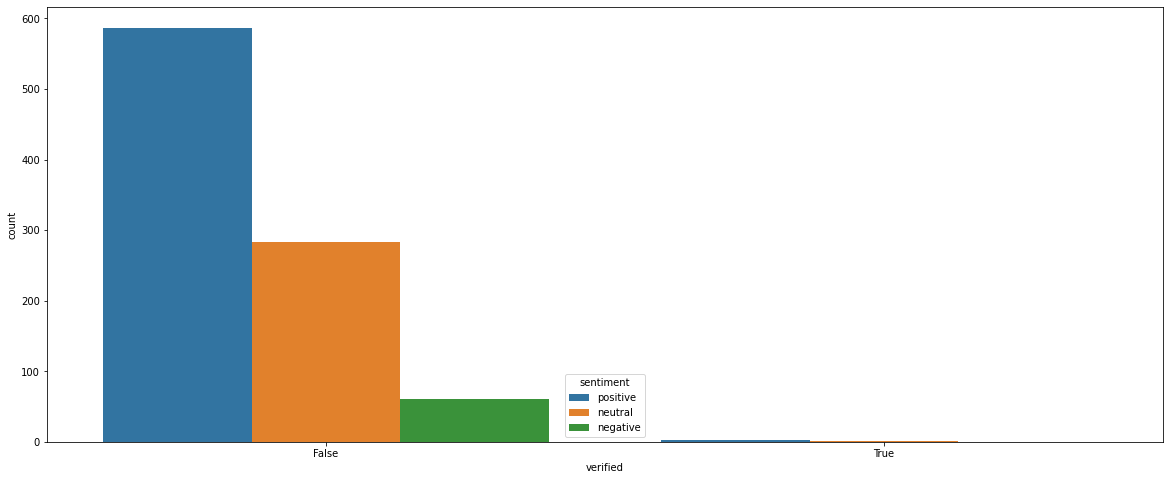

In [22]:
fig, axarr = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(x='verified', hue = 'sentiment',data = df_tweets, ax=axarr)

### Continuous Information

<AxesSubplot:xlabel='sentiment', ylabel='friends_count'>

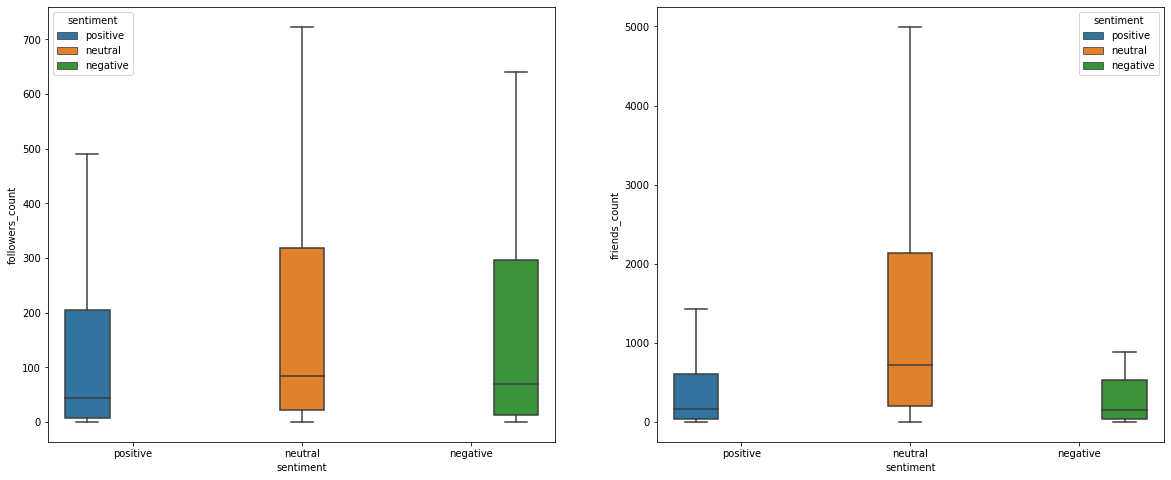

In [23]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(y='followers_count',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[0], showfliers=False)
sns.boxplot(y='friends_count',x = 'sentiment', hue = 'sentiment',data = df_tweets, ax=axarr[1], showfliers=False)